# Trotter error interference in the second-order PF
The second-order Product (Trotter) Formula reads

$$
U_{pf2} = \prod_{l=1}^L e^{-i H_l t/(2r)}  \prod_{l=L}^1 e^{-i H_l t/(2r)} 
$$

In [1]:
import numpy as np
from scipy.linalg import expm

from trotter import *
from lattice_hamiltonians import interference_bound, tight_bound
# from quantum_simulation_recipe import spin
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law
from plot_config import *


fig_dir, data_dir = './figs', './data'

from colorspace import qualitative_hcl, swatchplot
# pal = qualitative_hcl()
pal = qualitative_hcl("Dark 2")  # Dynamic
cc = [c+'FF' for c in pal(5)]  # Draw list of 4 colors across the palette
# print('color_cycle: ', cc)
# swatchplot([pal], figsize = (5, 0.5))
# ['#C87A8AFF', '#A29048FF', '#45A271FF', '#2A9EB5FF', '#A782C3FF']
set_color_cycle(cc)

## TFI PF2 Error VS t

In [2]:
prefix, suffix = 'TFI', 'PF2'
n, t = 8, 20
J, h = 2, 0.001
r_list = sorted(list(set(np.logspace(1.45, 2.0, 30, dtype=int))))
# r_list = np.logspace(1, 1.5, 20, dtype=int)
print('r_list: ', r_list)
data = {key: [] for key in ['r', 'emp_xz1', 'emp_eo1', 'bnd_xz1', 'bnd_eo1', 'emp_xz2', 'emp_eo2', 'bnd_xz2', 'bnd_eo2']}

for r in r_list:
    tfI = Nearest_Neighbour_1d(n=n, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=True)
    # tfI = TF_Ising_1d(n, J, h)
    exact_U = expm(-1j * t * tfI.ham.to_matrix())
    appro_U_xz1 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=1)
    appro_U_xz2 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=2)
    appro_U_eo1 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=1)
    appro_U_eo2 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=2)
    data['emp_xz1'].append(norm(exact_U - appro_U_xz1, ord=2))
    data['emp_xz2'].append(norm(exact_U - appro_U_xz2, ord=2))
    data['emp_eo1'].append(norm(exact_U - appro_U_eo1, ord=2))
    data['emp_eo2'].append(norm(exact_U - appro_U_eo2, ord=2))
    data['bnd_xz2'].append(tight_bound([term.to_matrix() for term in tfI.ham_xyz], 2, t, r))
    data['bnd_eo2'].append(tight_bound([term.to_matrix() for term in tfI.ham_par], 2, t, r))


r_list:  [28, 29, 30, 32, 33, 35, 36, 38, 39, 41, 43, 45, 47, 49, 51, 54, 56, 59, 61, 64, 67, 70, 73, 76, 80, 83, 87, 91, 95, 100]


a_em: -2.0; b_em: 4.426283206729443
a_em: -1.9313507668946246; b_em: 3.0175391550608563
a_em: -1.1281249865635035; b_em: -1.6406284535048086
a_em: -6.685245791877723; b_em: 17.959320712257835
a_em: -2.148680646814133; b_em: 1.7441458796450418


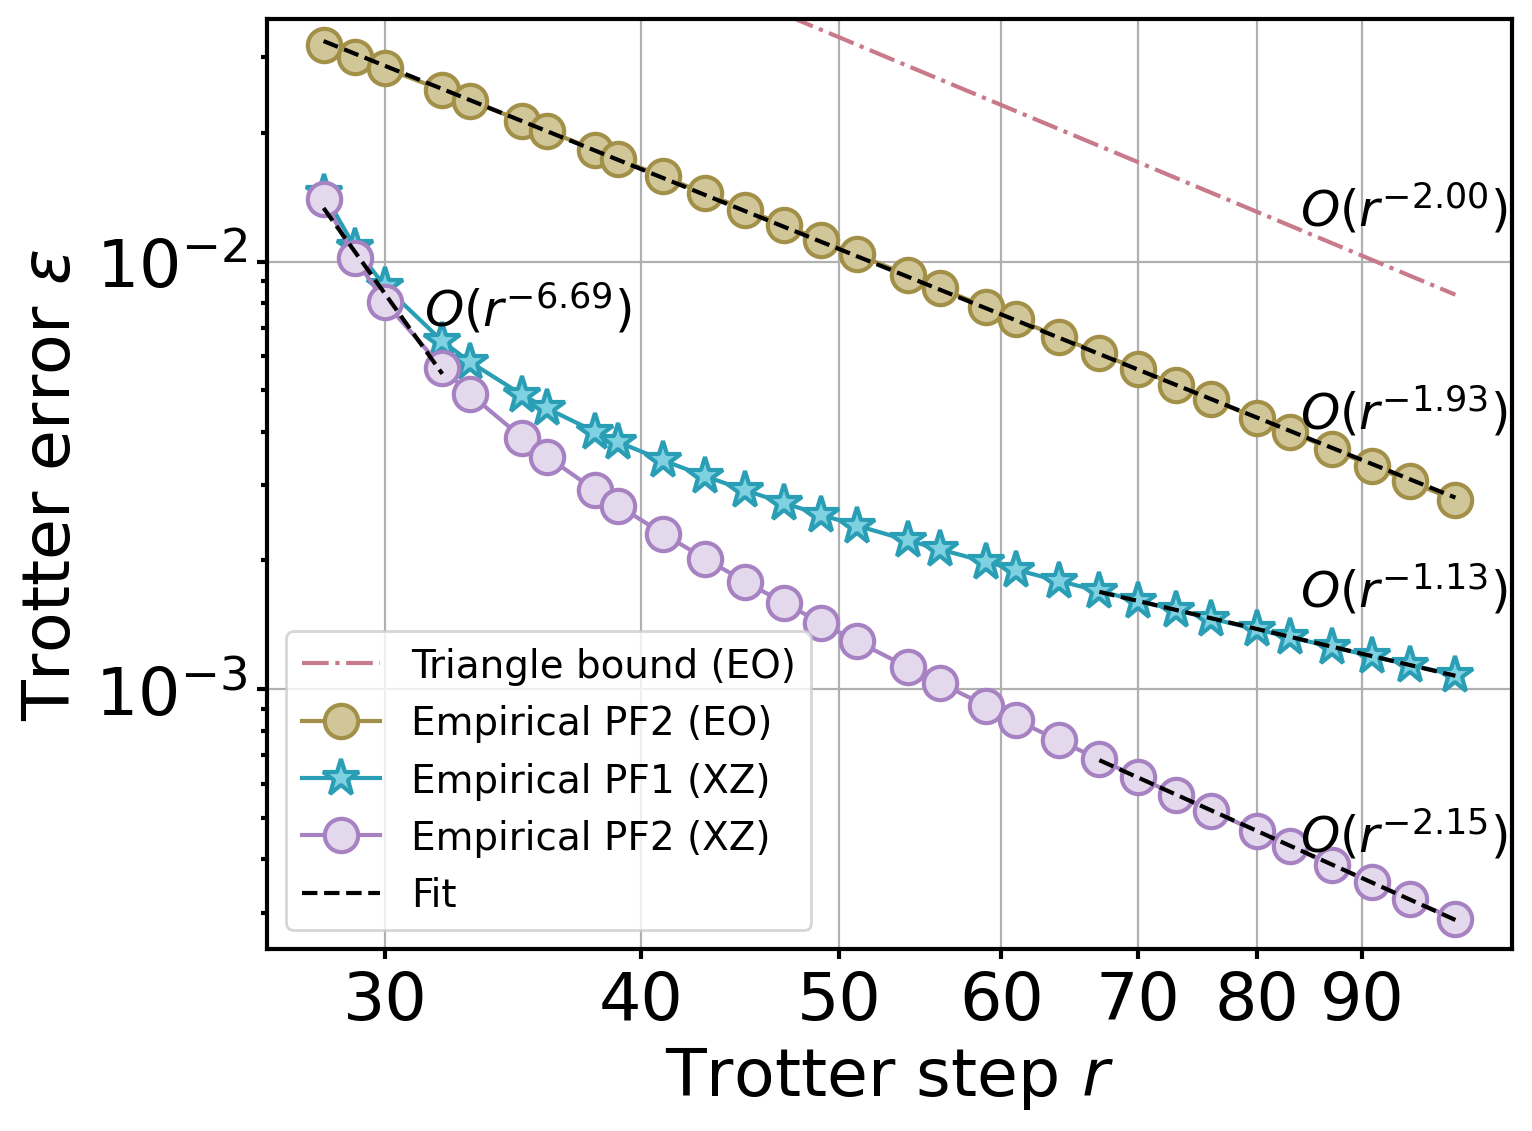

In [7]:
mpl.rcParams['lines.markersize'] = 12
plt.rc('legend', fontsize=MEDIUM_SIZE-4)  

set_color_cycle(['#45A271FF', '#C87A8AFF', '#A29048FF', '#2A9EB5FF', '#A782C3FF'], 0.25)
fig, ax = plt.subplots(1, 1)
plot_fit(ax, r_list, data['bnd_eo2'], var='r', y_offset=1.45, x_offset=0.84, linewidth=0.01)
ax.plot(r_list, data['bnd_eo2'], '-.', label='Triangle bound (EO)')
# ax.plot(r_list, data['bnd_xz2'], '--', label='Triangle bound (XZ)')
# ax.plot(r_list, data['emp_eo1'], 'o-', label='Empirical PF1 (EO)')
ax.plot(r_list, data['emp_eo2'], 'o-', label='Empirical PF2 (EO)')
ax.plot(r_list, data['emp_xz1'], '*-', label='Empirical PF1 (XZ)', markersize=14)
ax.plot(r_list, data['emp_xz2'], 'o-', label='Empirical PF2 (XZ)')
plot_fit(ax, r_list, data['emp_eo2'], var='r', y_offset=1.45, x_offset=0.84)
plot_fit(ax, r_list[-10:], data['emp_xz1'][-10:], var='r', y_offset=1.45, x_offset=0.84)
plot_fit(ax, r_list[:4], data['emp_xz2'][:4], var='r', y_offset=1.3, x_offset=0.98)
plot_fit(ax, r_list[-10:], data['emp_xz2'][-10:], label='Fit', var='r', y_offset=1.45, x_offset=0.84)
ax_set_text(ax, r'Trotter step $r$', r'Trotter error $\epsilon$', log='xy', xticks=[30,40,50,60,70,80,90], ylim=[min(data['emp_xz2']), max(data['emp_eo2'])])  # ax.set_ylim([3e-5, 5e-3])
# ax.set_title(f'PF2, TFI (J={J}, h={h}), t={t}')
fig.savefig(f'{fig_dir}/{prefix}_{suffix}_n={n}_t={t}.pdf')

+1
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++67
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++133
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++199
a_em: 2.7734797849075568; b_em: -15.767198212638842


Text(0.5, 1.0, 'PF2_TFI (J=2, h=0.001), r=50')

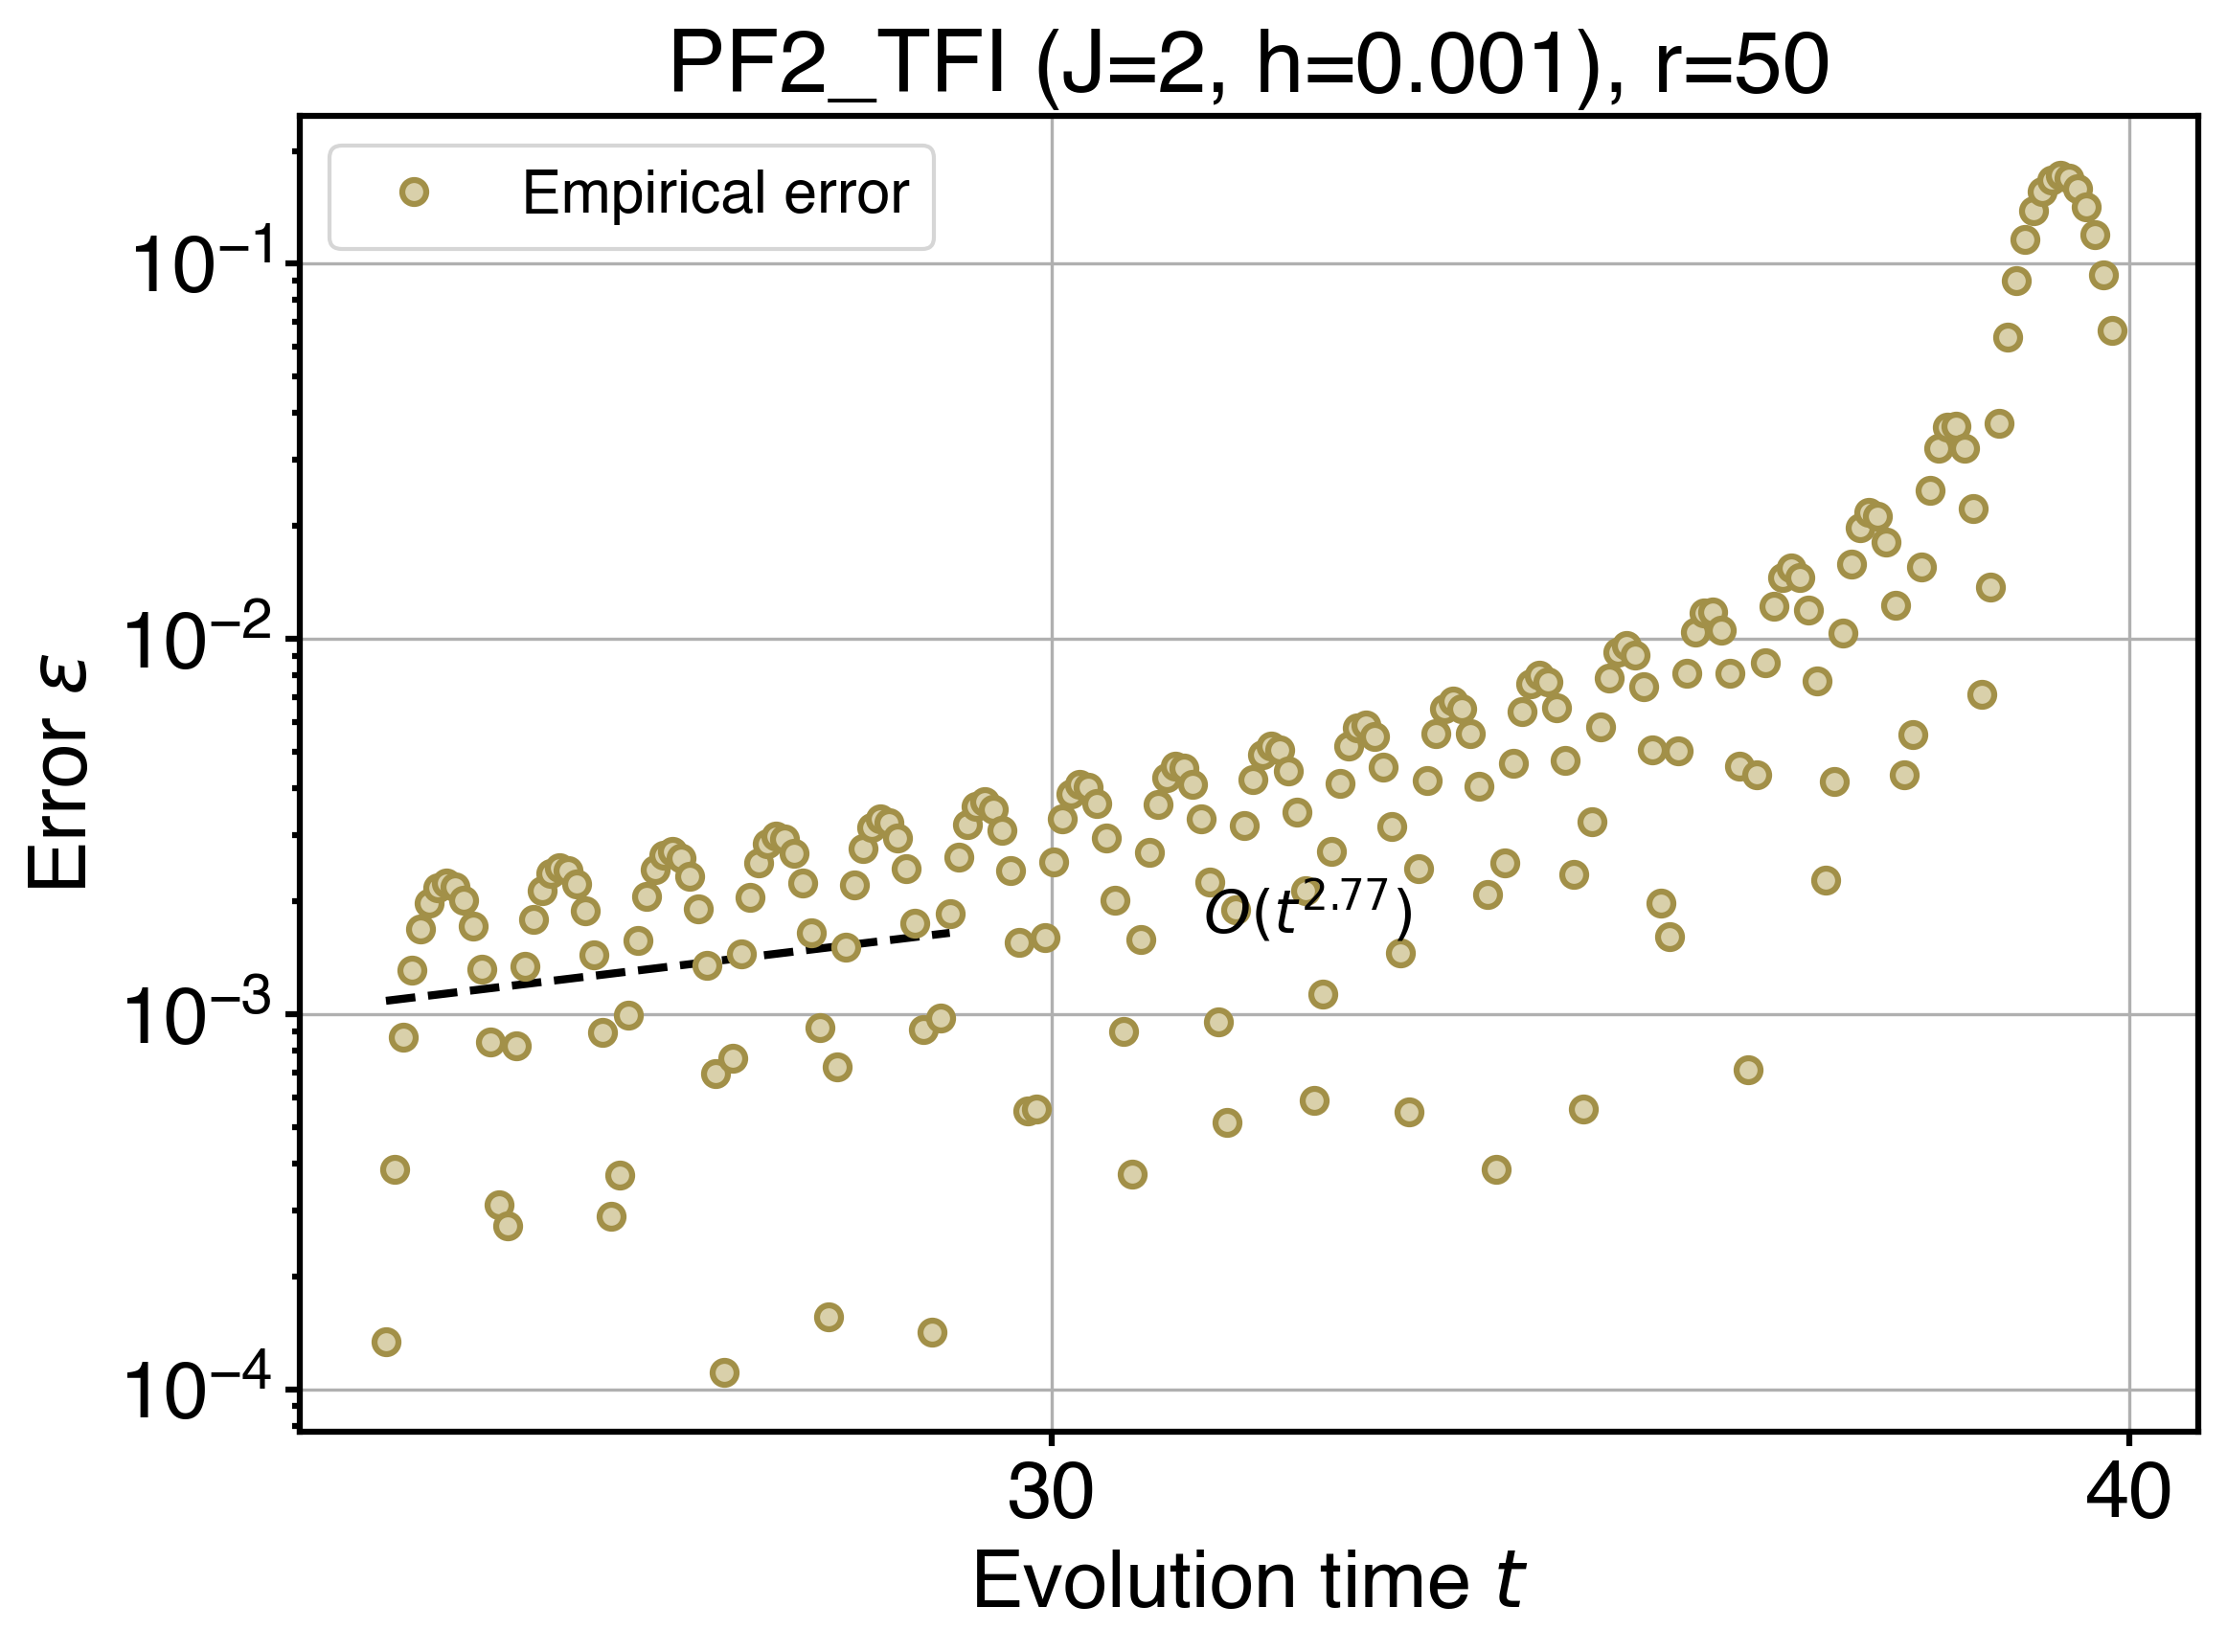

In [ ]:
n = 7
r = 50
J, h = 2, 0.001
prefix, suffix = 'TFI', 'PF2'
t_list = np.logspace(1.4, 1.6, 200)
# t_list = sorted(list(set(np.linspace(10, 100, 85, dtype=int))))
# print('t_list: ', t_list)
emp_err_list_xz= []

for index, t in enumerate(t_list):
    if index % int(len(t_list)/3) == 1: print(index) 
    else: print('+', end='')
    tfI = Nearest_Neighbour_1d(n=n, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=True)
    exact_U = expm(-1j * t * tfI.ham.to_matrix())
    appro_U_xyz = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=2)
    emp_err_list_xz.append(norm(exact_U - appro_U_xyz, ord=2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_fit(ax, t_list[:int(len(t_list)/3)], emp_err_list_xz[:int(len(t_list)/3)], var='t', x_offset=1.07, verbose=True)
ax.plot(t_list, emp_err_list_xz, '.', label='Empirical error')
ax_set_text(ax, r'Evolution time $t$', r'Error $\epsilon$', log='xy', xticks=[30, 40])  # ax.set_ylim([3e-5, 5e-3])

ax.set_title(f'{prefix} (J={J}, h={h}), r={r}')
# fig.savefig(f'{fig_dir}/{prefix}_err_n={n}_r={r}.pdf', dpi=300)

## XZ and Parity grouping

In [5]:
prefix, suffix = "PF2_intefer", "TFI"
n = 8
J, h = 2.0, 0.01 
t = 20
r_list = np.logspace(1.4, 2.5, 20, dtype=int)
print("r_list: ", r_list)
err_list_pf1_xyz, err_list_pf2_xyz = [], []
err_list_pf1_par, err_list_pf2_par = [], []

tfI = Nearest_Neighbour_1d(n=n, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=True)
#  = TF_Ising_1d(n=n, J=J, h=h, pbc=False)
print(tfI.ham)
print("xyz: ", tfI.ham_xyz)
print("parity: ", tfI.ham_par)
assert sum([h.to_matrix() for h in tfI.ham_xyz]).all() == sum([h.to_matrix() for h in tfI.ham_par]).all()

for r in r_list:
    exact_U = expm(-1j * t * tfI.ham.to_matrix())
    appro_U_xyz_pf1 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=1, use_jax=False)
    appro_U_xyz_pf2 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=2, use_jax=False)
    appro_U_par_pf1 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=1, use_jax=False)
    appro_U_par_pf2 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=2, use_jax=False)
    err_list_pf1_xyz.append(norm(exact_U - appro_U_xyz_pf1))
    err_list_pf2_xyz.append(norm(exact_U - appro_U_xyz_pf2))
    err_list_pf1_par.append(norm(exact_U - appro_U_par_pf1))
    err_list_pf2_par.append(norm(exact_U - appro_U_par_pf2))

xyz_group = [h.to_matrix() for h in tfI.ham_xyz]
par_group = [h.to_matrix() for h in tfI.ham_par]
# print(par_group)

interf_bound_par = np.array([interference_bound(par_group, t, r) for r in r_list])
# print('interf_bound_par:', interf_bound_par)
interf_bound_xyz = np.array([interference_bound(xyz_group, t, r) for r in r_list])

e_pf1_tight_xyz = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
e_pf1_tight_par = np.array([tight_bound(par_group, 1, t, r) for r in r_list])
e_pf2_tight_xyz = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])
e_pf2_tight_par = np.array([tight_bound(par_group, 2, t, r) for r in r_list])

r_list:  [ 25  28  32  37  42  48  55  63  72  83  95 108 124 142 162 185 211 242
 276 316]
SparsePauliOp(['IIIIIIZZ', 'IIIIIZZI', 'IIIIZZII', 'IIIZZIII', 'IIZZIIII', 'IZZIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'IIIIIIIX', 'IIIIIIXI', 'IIIIIXII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j,
 2.  +0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j,
 0.01+0.j, 0.01+0.j])
xyz:  [SparsePauliOp(['IIIIIIIX', 'IIIIIIXI', 'IIIIIXII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j,
 0.01+0.j]), SparsePauliOp(['IIIIIIZZ', 'IIIIIZZI', 'IIIIZZII', 'IIIZZIII', 'IIZZIIII', 'IZZIIIII', 'ZZIIIIII', 'ZIIIIIIZ'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j])]
parity:  [SparsePauliOp(['IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'IIIIIIIX', 'IIIII

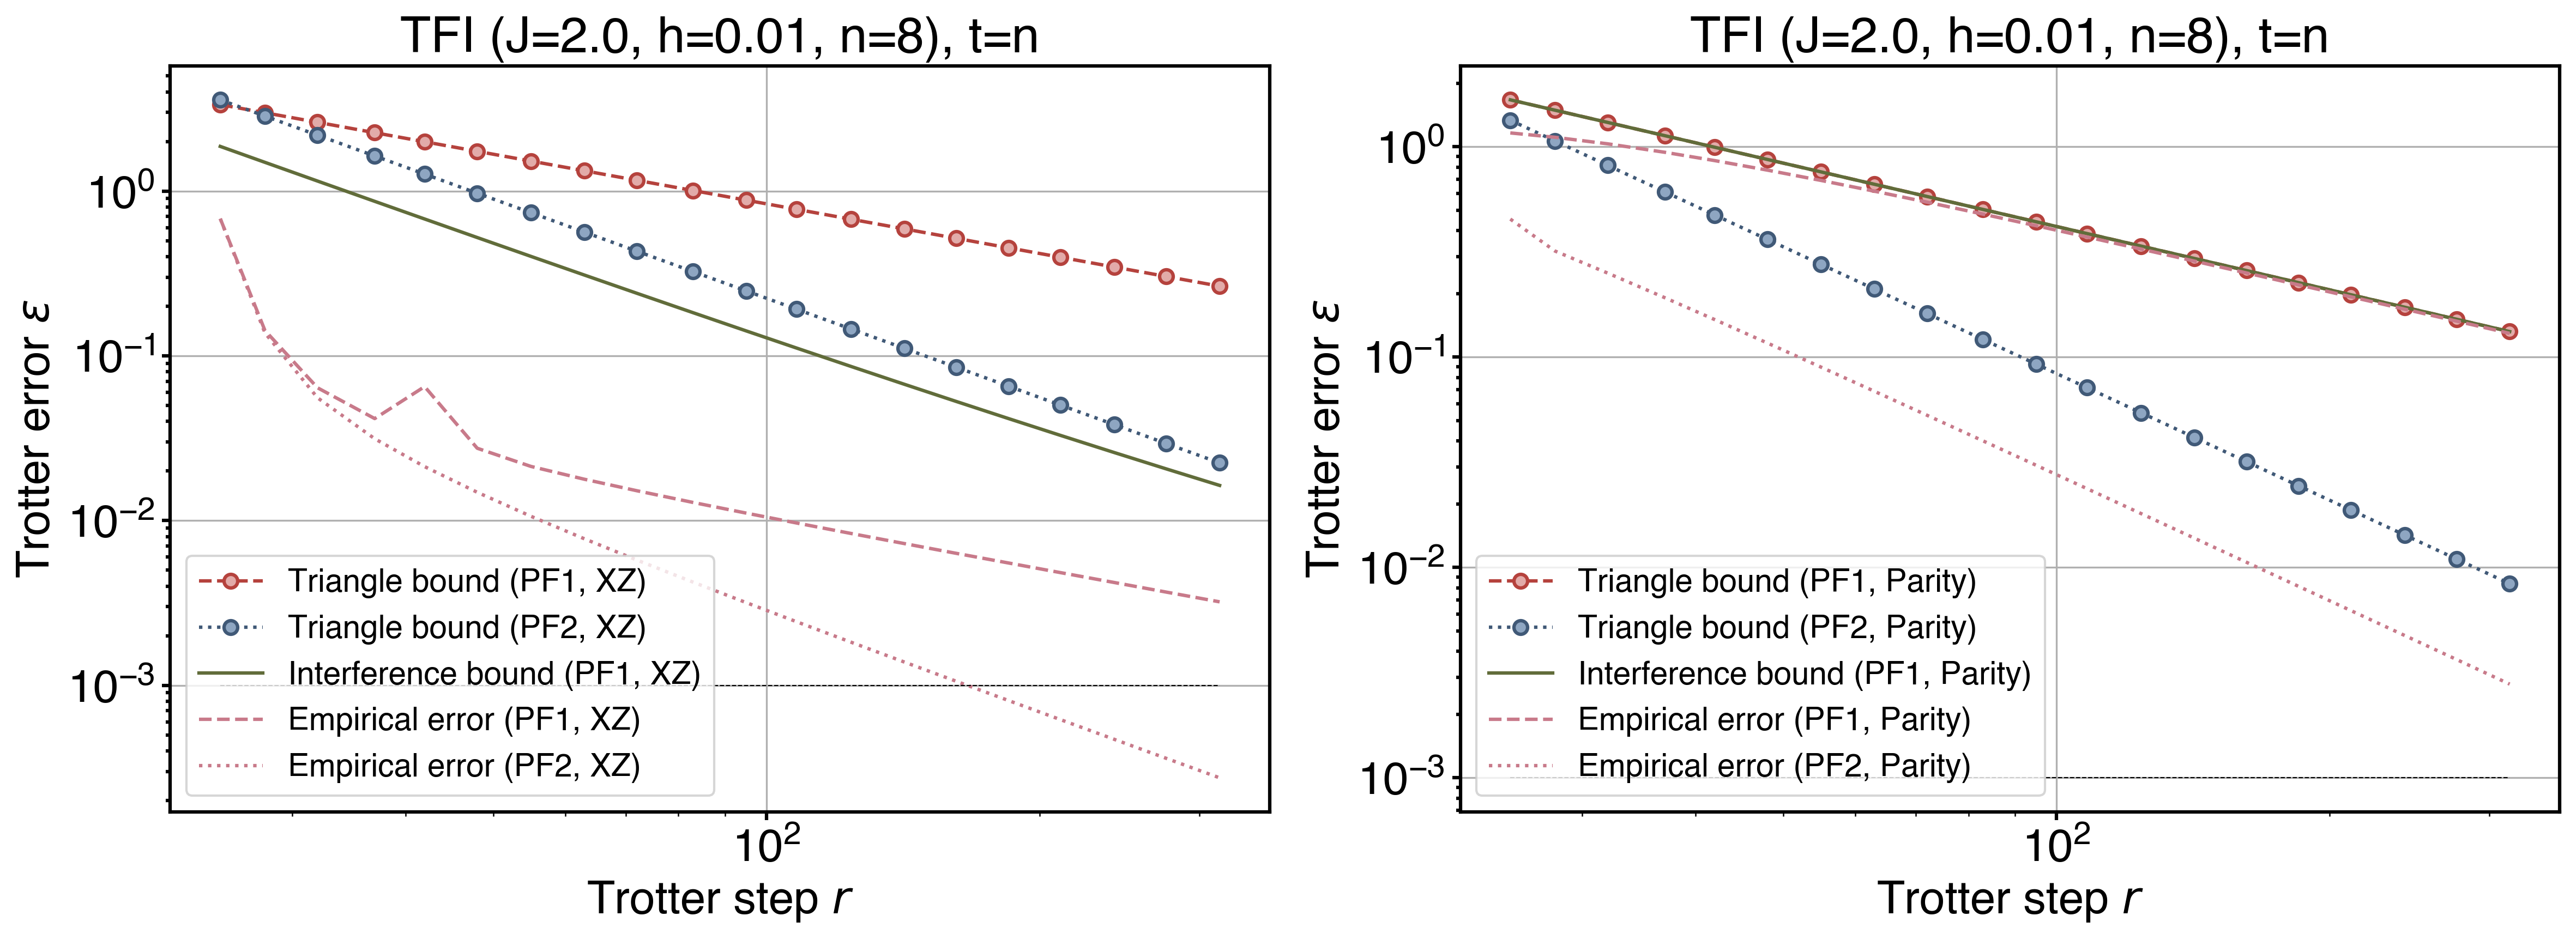

In [6]:
## visualization
plt.rc('legend', fontsize=MEDIUM_SIZE-4) 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[1].plot(r_list, e_pf1_tight_par, '.--', label='Triangle bound (PF1, Parity)')
axes[0].plot(r_list, e_pf1_tight_xyz, '.--', label='Triangle bound (PF1, XZ)')
axes[1].plot(r_list, e_pf2_tight_par, '.:', label='Triangle bound (PF2, Parity)')
axes[0].plot(r_list, e_pf2_tight_xyz, '.:', label='Triangle bound (PF2, XZ)')

axes[1].plot(r_list, interf_bound_par[:, 0], '-', label='Interference bound (PF1, Parity)')
axes[0].plot(r_list, interf_bound_xyz[:, 0], '-', label='Interference bound (PF1, XZ)')

axes[0].plot(r_list, err_list_pf1_xyz, '--', label='Empirical error (PF1, XZ)', c=cc[0])
axes[0].plot(r_list, err_list_pf2_xyz, ':', label='Empirical error (PF2, XZ)', c=cc[0])
axes[1].plot(r_list, err_list_pf1_par, '--', label='Empirical error (PF1, Parity)', c=cc[0])
axes[1].plot(r_list, err_list_pf2_par, ':', label='Empirical error (PF2, Parity)', c=cc[0])

for ax in axes:
    ax.hlines(1e-3, r_list[0], r_list[-1], 'k', '--', linewidth=0.5)
    ax_set_text(ax, r'Trotter step $r$', r'Trotter error $\epsilon$', log='xy')
    ax.set_title(f'TFI (J={J}, h={h}, n={n}), t=n')
    # ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

fig.savefig(f'{fig_dir}/{prefix}_n={n}_t={t}_J={J}_h={h}_{suffix}.pdf', bbox_inches='tight')